In [796]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc


import warnings #for dealing with errors that not actully an error but a warning
warnings.filterwarnings('ignore')

# For displaying plots inline
%matplotlib inline

In [481]:
!pip install imbalanced-learn


In [677]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.1 MB/s eta 0:01:12
   ---------------------------------------- 0.8/150.0 MB 2.0 MB/s eta 0:01:16
   ---------------------------------------- 1.3/150.0 MB 2.0 MB/s eta 0:01:16
   ---------------------------------------- 1.8/150.0 MB 2.0 MB/s eta 0:01:14
    --------------------------------------- 2.1/150.0 MB 2.0 MB/s eta 0:01:15
    --------------------------------------- 2.6/150.0 MB 2.0 MB/s eta 0:01:14
    --------------------------------------- 2.9/150.0 MB 2.0 MB/s eta 0:01:14
    --------------------------------------- 3.4/150.0 MB 2.0 MB/s eta 0:01:13
    --------------------------------------- 3.7/150.0 MB 2.0 MB/s eta 0:01:13
   - -------------------------------------- 4.2/150.0 MB 2.0 MB/s eta 0:01:13
   - -------------------------------------- 4.7/150.0 MB 2.0 MB/s eta 0:01:13


In [798]:
#Reading the data set/data frame
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# cleaning and Preprocessing

In [801]:
#Checking if there is any messing data(none in this data set because it was alredy cleaned from kaggle)
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [803]:
# Define columns to cleane them based on weather they are are numeric or not
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
string_col = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
              'StreamingMovies', 'Contract', 'PaymentMethod']

# Handling Numerical Columns (by removing any none-numeric values and by replacing any NANs with the mean)
for col in num_col:
    # Convert to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Fill NaN with the mean of the column
    df[col] = df[col].fillna(df[col].mean())

# Handling Categorical Columns (by filling missing values with the mode)
for col in string_col:
    # Fill missing values with the mode (most frequent value)
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify the changes
print(df.isnull().sum())  # Check for remaining missing values


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [805]:
df.drop('customerID' , axis=1 , inplace=True) #droping the ID because it's not meaningful to the data frame

In [807]:
#encoding/mapping columns that has two values to be 1s&0s

df['gender'] = df['gender'].str.strip().str.upper()
df['gender'] = df['gender'].map(
    {
        'FEMALE' : 1,
        'MALE' : 0
    }
)

df['Churn'] = df['Churn'].str.strip().str.upper()
df['Churn'] = df['Churn'].map(
    {
        'YES' : 1,
        'NO' : 0
    }
)

In [809]:
#encoding the columns that are strings by using the one_hot method
df= pd.get_dummies(df, columns =['MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'Contract' , 'PaymentMethod'] , drop_first = True) 									

In [811]:
#encoding the yes and no columns to 1s&0s
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[yes_no_columns] = df[yes_no_columns].replace({'Yes':1 , 'No':0}) 	

In [813]:
#checking the types to ensure that they are all numeric and no objects
print(df.dtypes)

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service             int32
MultipleLines_Yes                          int32
InternetService_Fiber optic                int32
InternetService_No                         int32
OnlineSecurity_No internet service         int32
OnlineSecurity_Yes                         int32
OnlineBackup_No internet service           int32
OnlineBackup_Yes                           int32
DeviceProtection_No internet service       int32
DeviceProtection_Yes                       int32
TechSupport_No inter

In [815]:
#standralizing the numeric data so that the model will treat all with equall importance
scaler = StandardScaler()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
to_standard = ['tenure','MonthlyCharges','TotalCharges']
df[to_standard] = scaler.fit_transform(df[to_standard])

In [817]:
#ensure there is no duplicated rows by removing them if there is any(and keeping the first)
df.drop_duplicates(inplace=True , keep='first')

In [819]:
#dispalying to ensure there is none left
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, PaperlessBilling, MonthlyCharges, TotalCharges, Churn, MultipleLines_No phone service, MultipleLines_Yes, InternetService_Fiber optic, InternetService_No, OnlineSecurity_No internet service, OnlineSecurity_Yes, OnlineBackup_No internet service, OnlineBackup_Yes, DeviceProtection_No internet service, DeviceProtection_Yes, TechSupport_No internet service, TechSupport_Yes, StreamingTV_No internet service, StreamingTV_Yes, StreamingMovies_No internet service, StreamingMovies_Yes, Contract_One year, Contract_Two year, PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check]
Index: []


In [821]:
#displaying the data frame after the cleaning
pd.set_option('display.max_columns', None)
df.head(30)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.277445,0,1,-1.160323,-0.994971,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0.066327,1,0,-0.259629,-0.173876,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,-1.236724,1,1,-0.362660,-0.960399,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0.514251,0,0,-0.746535,-0.195400,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,-1.236724,1,1,0.197365,-0.941193,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,-0.992402,1,1,1.159546,-0.645874,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
6,0,0,0,1,-0.422317,1,1,0.808907,-0.147428,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
7,1,0,0,0,-0.910961,0,0,-1.163647,-0.874852,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1,0,1,0,-0.177995,1,1,1.330711,0.336779,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
9,0,0,0,1,1.206498,1,0,-0.286218,0.531892,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


# Visualization(EDA)

In [824]:
#adding a style to all the figures
sns.set_style("whitegrid")

In [826]:
#to give a simple describtion of the data set
df.describe() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.495656,0.162512,0.484546,0.300527,0.004003,0.902863,0.592651,0.002998,0.003109,0.264492,0.097137,0.423159,0.440108,0.215354,0.215354,0.287566,0.215354,0.345962,0.215354,0.344965,0.215354,0.291127,0.215354,0.385558,0.215354,0.389118,0.209799,0.241419,0.216778,0.335992,0.227318
std,0.500017,0.368947,0.499797,0.458520,0.999073,0.296166,0.491376,0.999372,1.000090,0.441094,0.296166,0.494095,0.496435,0.411097,0.411097,0.452660,0.411097,0.475715,0.411097,0.475391,0.411097,0.454314,0.411097,0.486761,0.411097,0.487585,0.407194,0.427974,0.412080,0.472370,0.419130
min,0.000000,0.000000,0.000000,0.000000,-1.318165,0.000000,0.000000,-1.545860,-0.999850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-0.951682,1.000000,0.000000,-0.964231,-0.826615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,-0.137274,1.000000,1.000000,0.187394,-0.385480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.921455,1.000000,1.000000,0.835495,0.670423,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.613701,1.000000,1.000000,1.794352,2.826469,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


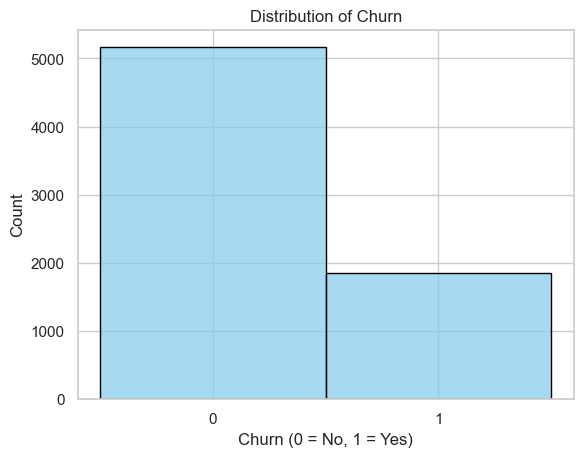

In [828]:
#histogram of the Churn
sns.histplot(df['Churn'], bins=2, discrete=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()
#Insight: The dataset is slightly imbalanced, with more customers not churning (0) than churning (1).

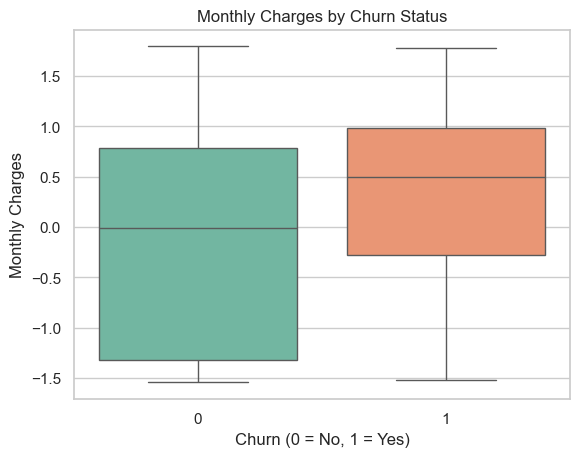

In [830]:
#boxPlot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.show()
#Insight: Customers who churn tend to have higher monthly charges, indicating pricing could be a factor influencing churn.

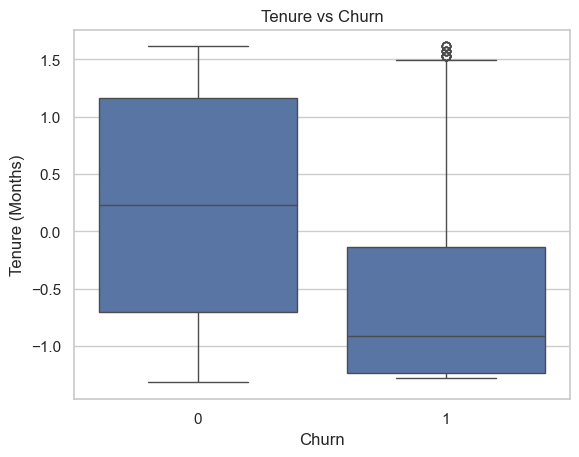

In [832]:
#Tenure box plot

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

# Insight: Churning customers often have lower tenure,means that new customers are more likely to leave.

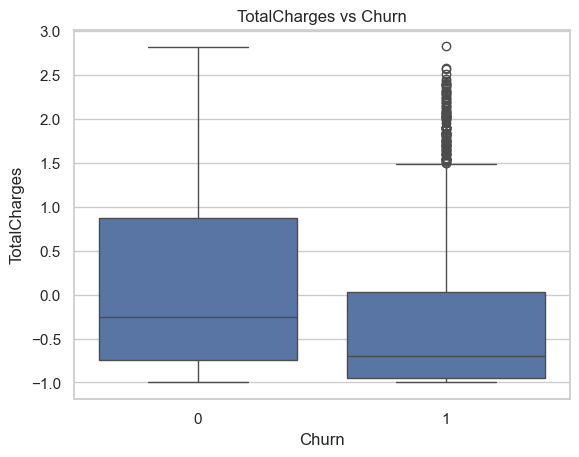

In [834]:
#TotalCharges box plot

sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("TotalCharges vs Churn")
plt.xlabel("Churn")
plt.ylabel("TotalCharges")
plt.show()
#insight: Customers who churned generally had lower total charges compared to those who stayed.
#This suggests that churned customers are likely newer or have not been long-term subscribers,
#meaning they hadn’t accumulated high charges before canceling

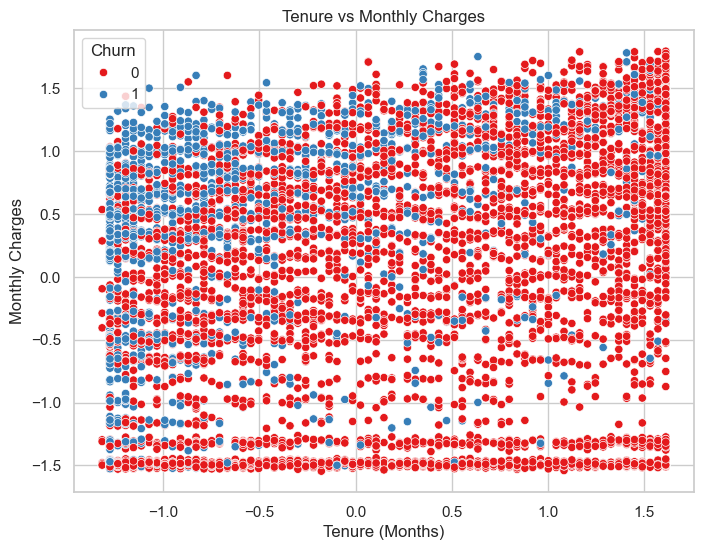

In [836]:
#tenure with monthelyCharges

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, palette='Set1')
plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.show()

#High charges + low tenure might relate to higher churn

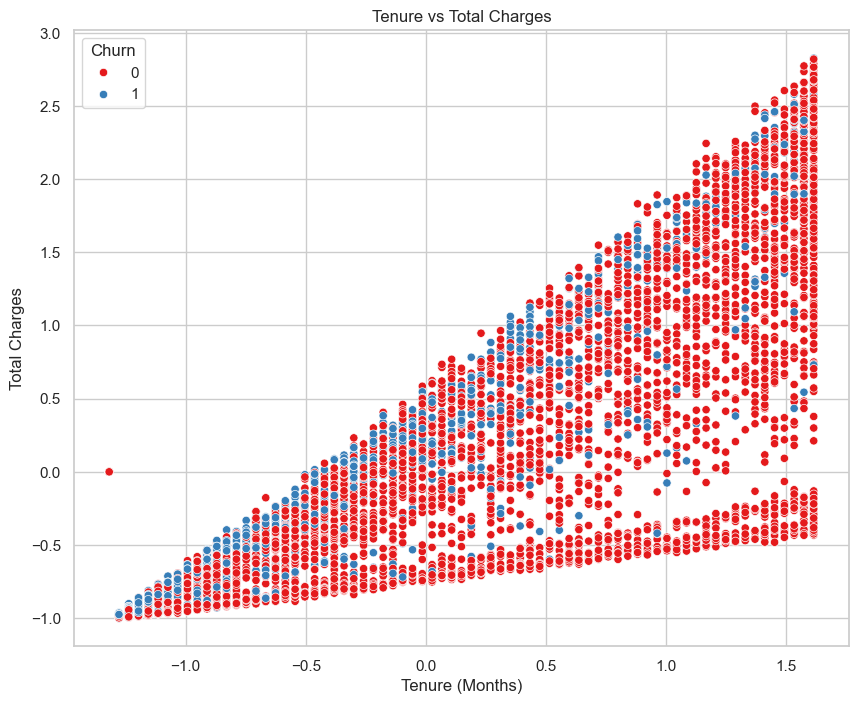

In [838]:
#tenur and TotalCharges

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df, palette='Set1')
plt.title('Tenure vs Total Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges')
plt.grid(True)
plt.show()

#Linear pattern — good indication of predictable spending behavior.

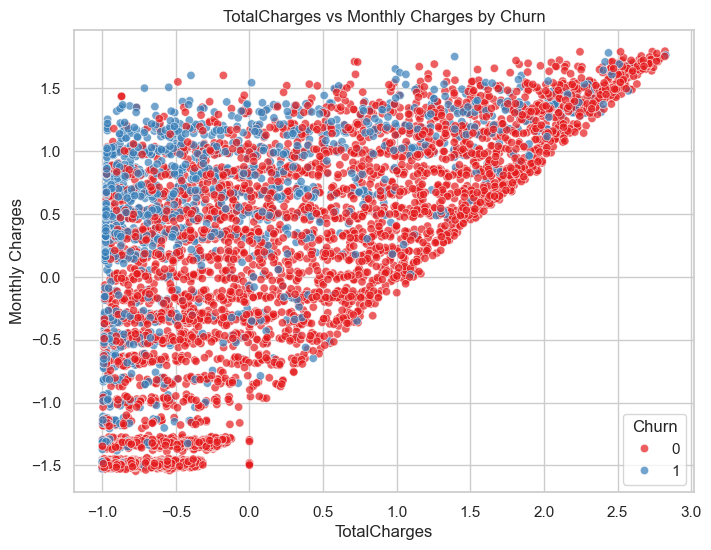

In [855]:
#scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='Churn', data=df, palette='Set1', alpha=0.7)
plt.title('TotalCharges vs Monthly Charges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn')
plt.show()

#Insight: Clusters of churned customers are observed in low-tenure & high-charge regions.

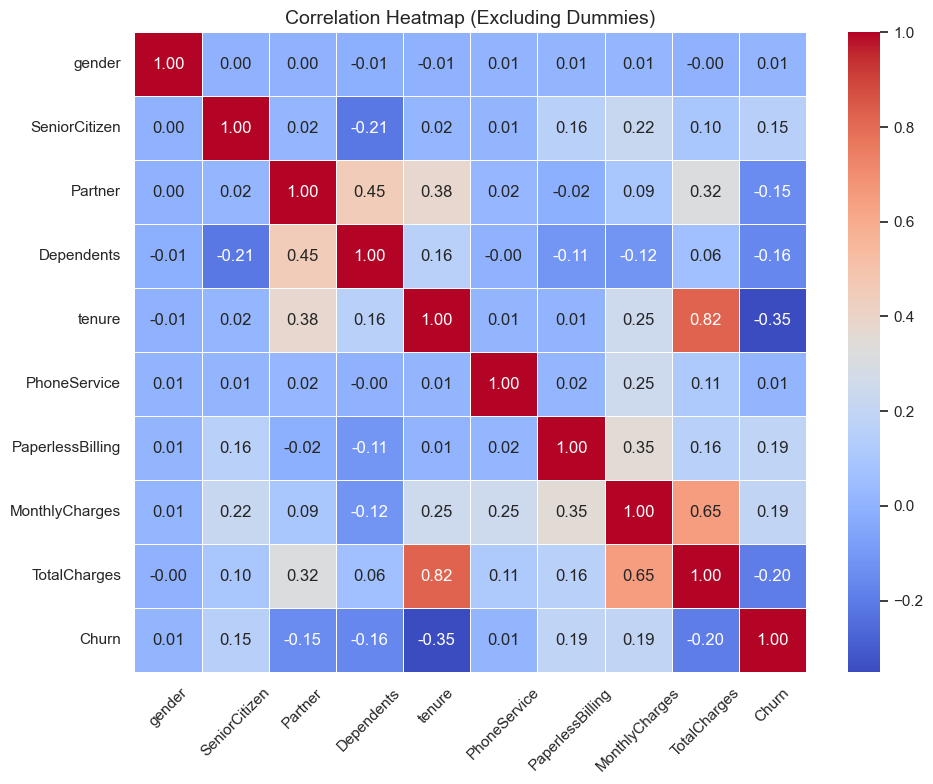

In [841]:
#Heat plot
# Select only numeric columns that are not dummies (no underscores in column names)
numeric_df = df.select_dtypes(include='number')
filtered_numeric = numeric_df.loc[:, ~numeric_df.columns.str.contains('_')]

# Compute the correlation matrix
corr_matrix = filtered_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Excluding Dummies)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#TotalCharges and tenure likely show a strong positive correlation ,
#means customers who stay longer naturally accumulate more charges.

#MonthlyCharges and tenure might have low or even negative correlation,
#means that higher monthly = shorter stays.

#Churn have a negative correlation with tenure,
#means that people who stay longer are less likely to churn.

# Insightfulness

# Modeling


In [845]:
#preparing the data and spliting it

# Prepare data for modeling
X = df.drop('Churn', axis=1) #input
y = df['Churn'] #output

# Split dataset into train and test sets , with 20% for the test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [847]:
# Check for any non-numeric columns(not really helpful as we cleaned the df but we do this just in case 
# because Mutual Info Scores only accepts numeric values)
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)
# Drop non-numeric columns (like 'customerID' or unencoded categorical columns)
X_train_clean = X_train.drop(columns=non_numeric_cols)


Non-numeric columns: Index([], dtype='object')


Top 10 Features by Mutual Info Score:
['tenure', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'TotalCharges', 'MonthlyCharges', 'StreamingTV_No internet service', 'InternetService_No', 'DeviceProtection_No internet service', 'OnlineSecurity_No internet service']


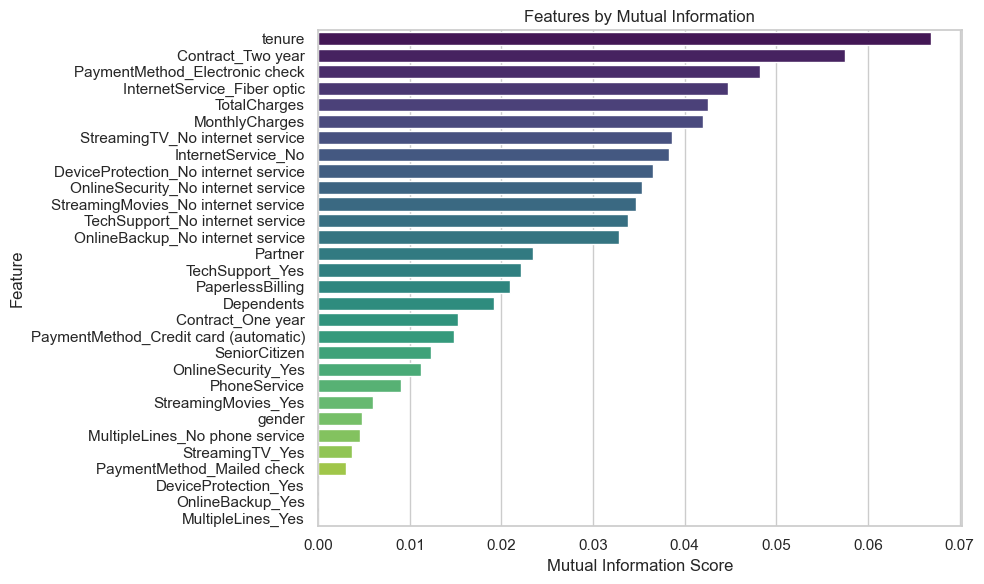

In [849]:
#Generating Top features

#Calculating Mutual Info Scores
mi_scores = mutual_info_classif(X_train_clean, y_train)

#creating a DataFrame
mi_df = pd.DataFrame({
    'Feature': X_train_clean.columns,
    'Mutual_Info_Score': mi_scores
})

#sorting the scores
mi_df = mi_df.sort_values(by='Mutual_Info_Score', ascending=False)

#selecting Top Features
top_features = mi_df['Feature'].head(10).tolist()
print("Top 10 Features by Mutual Info Score:")
print(top_features)

#Visualizing/Ploting the Top Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual_Info_Score', y='Feature', data=mi_df , palette='viridis')
plt.title("Features by Mutual Information")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


LinearRegression Model Evaluation:
Mean Absolute Error (MAE): 0.29761207713563737
Mean Squared Error (MSE): 0.14205674749499167
R-squared: 0.2702547882933075
--------------------------------------------------
DecisionTreeClassifier Model Evaluation:
Mean Absolute Error (MAE): 0.2782918149466192
Mean Squared Error (MSE): 0.2782918149466192
R-squared: -0.4295844653322094
--------------------------------------------------
XGBoostRegressor Model Evaluation:
Mean Absolute Error (MAE): 0.2855768289098958
Mean Squared Error (MSE): 0.16362993132829384
R-squared: 0.1594332456588745
--------------------------------------------------
GradientBoostingRegressor Model Evaluation:
Mean Absolute Error (MAE): 0.27771960566623527
Mean Squared Error (MSE): 0.13849804393216425
R-squared: 0.28853584097578167
--------------------------------------------------
GradientBoostingClassifier Model Evaluation:
Mean Absolute Error (MAE): 0.19430604982206406
Mean Squared Error (MSE): 0.19430604982206406
R-squared: 0

<Figure size 1200x600 with 0 Axes>

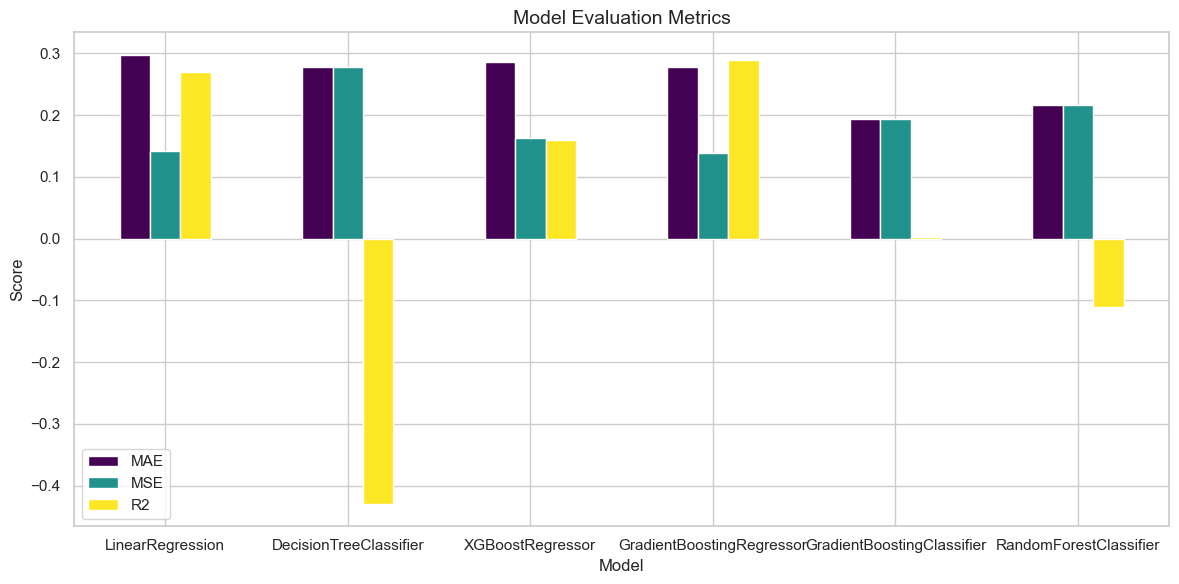

In [850]:
# Defining the models
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'XGBoostRegressor': XGBRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'GradientBoostingClassifier' : GradientBoostingClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}

# Initializing an empty dictionary to store results
results = {}

# Looping through the models dictionary
for model_name, model in models.items():
    # Fiting the model to the training data
    model.fit(X_train, y_train)
    
    # Making predictions
    predictions = model.predict(X_test)
    
    # Evaluating the model
    mae = mean_absolute_error(y_test, predictions)  # The lower, the better
    mse = mean_squared_error(y_test, predictions)   # The lower, the better
    r2 = r2_score(y_test, predictions)  
    # 1 indicating perfect predictions (the model explains 100% of the variance in the target variable),
    #0 indicating the model does not explain any of the variance (the predictions are as good as simply predicting the mean value),
    #Negative R² can occur if the model performs worse than simply predicting the mean value of the target variable.


    # Store the evaluation metrics in the results dictionary
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

    print(f"{model_name} Model Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print("-" * 50)


# Converting results into a DataFrame for easier plotting
results_df = pd.DataFrame(results).T  # Transpose to get models as rows and metrics as columns

# Visualizing the results and Ploting MAE, MSE, and R2 scores for each model
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customizing the plot
plt.title('Model Evaluation Metrics', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#insight: from the barPlot we now know that the best model is "GradientBoostingClassifier" for our data type (Classification)

# Predection and Accuracy Analysis

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.68      0.51      0.58       372

    accuracy                           0.81      1405
   macro avg       0.76      0.71      0.73      1405
weighted avg       0.80      0.81      0.80      1405



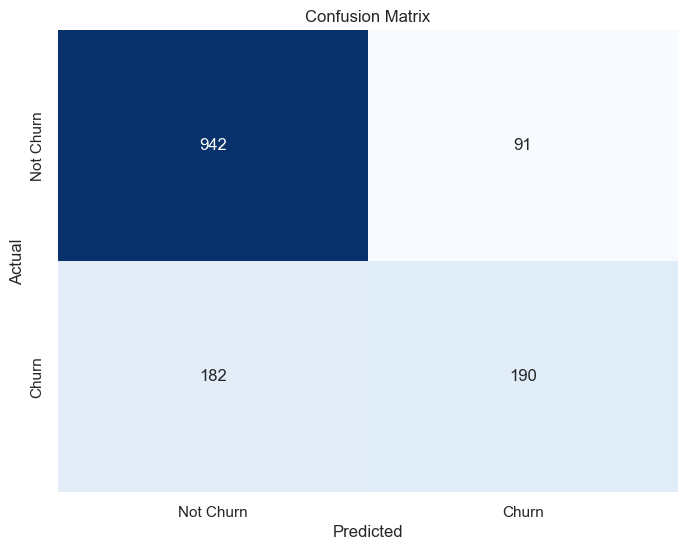

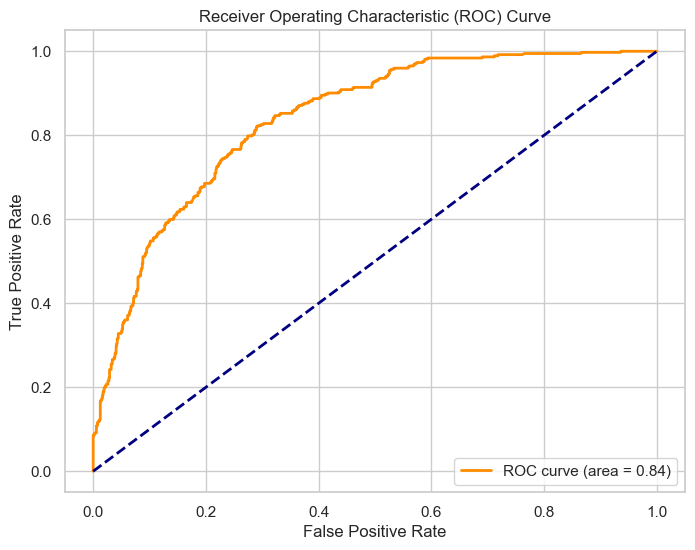

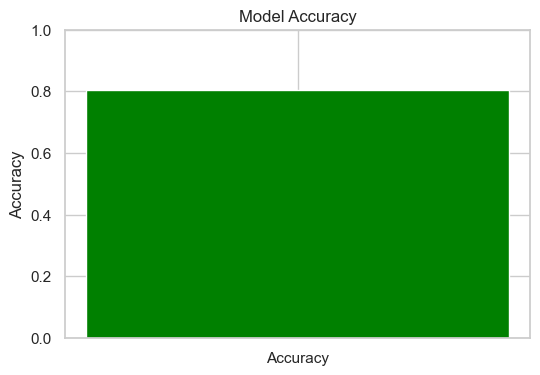

In [776]:
#Predecting using the GradientBoostingClassifier model

# Fiting the GradientBoostingClassifier model
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train, y_train)

# Predicting using the model
y_pred = gbc_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


#Different Vesualization/Analysis methods (for the accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Ploting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gbc_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Ploting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Showing accuracy on a bar plot
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy"], [accuracy], color='green')
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()

      Actual  Predicted  Correct
5627       0          1    False
6126       1          0    False
2361       1          1     True
2201       0          0     True
832        0          0     True
683        0          0     True
3403       0          0     True
6240       1          1     True
3996       0          0     True
4285       0          0     True
2286       0          0     True
2145       0          0     True
5317       1          0    False
4767       0          0     True
5469       0          0     True
3289       0          0     True
5915       0          0     True
6898       0          0     True
1785       0          0     True
4172       0          0     True
4711       0          0     True
6323       0          0     True
53         1          1     True
4940       0          1    False
5940       0          0     True
2482       0          1    False
2975       0          0     True
3730       1          0    False
3050       1          1     True
3371      

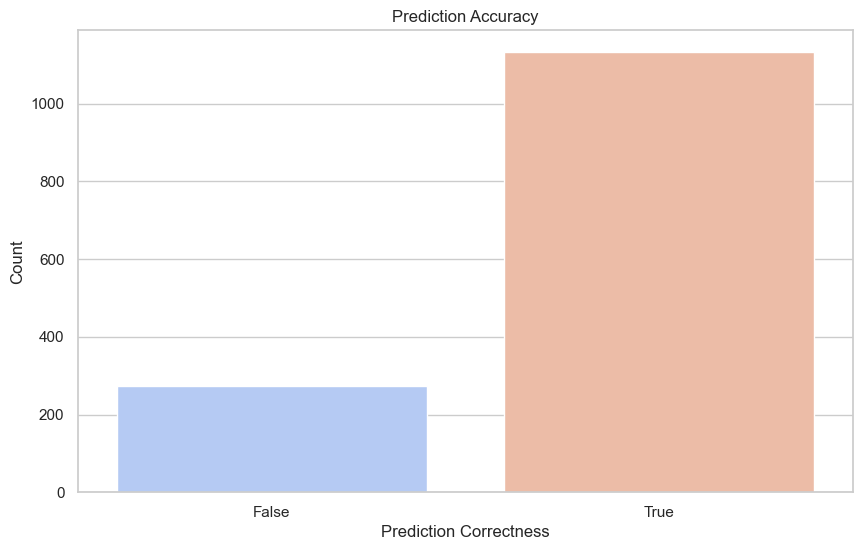

In [853]:
#Another method for accuracy analysis

# Creating a DataFrame with the actual and predicted values
pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

#adding a column to check if the prediction is correct
pred_df['Correct'] = pred_df['Actual'] == pred_df['Predicted']

# Displaying the DataFrame
print(pred_df.head(30))

#visualizing it
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Correct', data=pred_df, palette='coolwarm')
plt.title("Prediction Accuracy")
plt.xlabel('Prediction Correctness')
plt.ylabel('Count')
plt.show()

In [794]:
#del df